### Import dependencies

In [1]:
from ultralytics import YOLO, settings
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load in Model

In [2]:
# Load pretrained model for transfer learning
# Use yolov8n.pt for pretrained model
# Use yolov8n.yaml for blank model
model = YOLO("yolov8n.pt")

In [3]:
# Update directory settings to allow datset to load in properly
directory = "/home/garrett/Desktop/Workspace/NSIN_Sm_24/Model Optimization" # Insert location of local dataset here
settings.update({"datasets_dir": directory})
settings.update({"tensorboard": True}) # Enable tensorboard logging

# Train model on custom dataset
data_path = "./datasets/RGB_and_IR/data.yaml" # Insert location of custom dataset here
project_path = "./runs/RGB_and_IR_runs/Pretrained/" # Insert location of project here; where runs are saved
run_name = "pRGB_6_11_24" # Insert name of individual run here


results = model.train(
    data= data_path, 
    epochs=100, # 500 for blank models, 100 for pretrained models
    device=0, # GPU device
    plots=True, # Generates plots of training results
    verbose=True, # Creates more detailed output
    save_period=10, # Save period for model weights
    project = project_path,
    name = run_name
    )

New https://pypi.org/project/ultralytics/8.2.31 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA RTX 4000 Ada Generation Laptop GPU, 11911MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./datasets/RGB_and_IR/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=0, workers=8, project=./runs/RGB_and_IR_runs/Pretrained/, name=pRGB_6_11_24, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms

train: Scanning /home/garrett/Desktop/Workspace/NSIN_Sm_24/Model Optimization/datasets/RGB_and_IR/train/labels.cache... 21422 images, 5527 backgrounds, 0 corrupt: 100%|██████████| 21422/21422 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/garrett/Desktop/Workspace/NSIN_Sm_24/Model Optimization/datasets/RGB_and_IR/train/images/FLIR_05639_jpeg_jpg.rf.0930237992542a48f33862d046beed7e.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/garrett/Desktop/Workspace/NSIN_Sm_24/Model Optimization/datasets/RGB_and_IR/train/images/FLIR_05639_jpeg_jpg.rf.f2f69a5c4f4b0b9a6e26742f9f53bf8f.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/garrett/Desktop/Workspace/NSIN_Sm_24/Model Optimization/datasets/RGB_and_IR/train/images/FLIR_09055_jpeg_jpg.rf.3f65025a39739dccbf1693155c2d64f1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/garrett/Desktop/Workspace/NSIN_Sm_24/Model Optimization/datasets/RGB_and_IR/train/images/FLIR_09055_jpeg_jpg.rf.fa5edf3ad3223329a75781ef7e7c770a.jpg: 1 duplicate labels removed



val: Scanning /home/garrett/Desktop/Workspace/NSIN_Sm_24/Model Optimization/datasets/RGB_and_IR/valid/labels... 2720 images, 744 backgrounds, 0 corrupt: 100%|██████████| 2720/2720 [00:00<00:00, 3149.20it/s]

val: New cache created: /home/garrett/Desktop/Workspace/NSIN_Sm_24/Model Optimization/datasets/RGB_and_IR/valid/labels.cache


Plotting labels to runs/RGB_and_IR_runs/Pretrained/pRGB_6_11_24/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/RGB_and_IR_runs/Pretrained/pRGB_6_11_24
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.65G      1.762      2.014      1.222         54        640: 100%|██████████| 1339/1339 [01:16<00:00, 17.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.39it/s]


                   all       2720       6329      0.754      0.625      0.706      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.36G      1.732      1.405      1.217         31        640: 100%|██████████| 1339/1339 [01:17<00:00, 17.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 12.87it/s]


                   all       2720       6329      0.749      0.579      0.682      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.45G      1.784      1.401      1.259         31        640: 100%|██████████| 1339/1339 [01:23<00:00, 16.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.49it/s]


                   all       2720       6329      0.712       0.54      0.599      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.5G      1.799      1.385      1.283         44        640: 100%|██████████| 1339/1339 [01:24<00:00, 15.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 12.89it/s]


                   all       2720       6329      0.753      0.602      0.689      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.46G      1.744      1.288      1.262         36        640: 100%|██████████| 1339/1339 [01:24<00:00, 15.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.51it/s]


                   all       2720       6329      0.767       0.63      0.724      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.44G      1.704      1.225       1.24         68        640: 100%|██████████| 1339/1339 [01:24<00:00, 15.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.41it/s]


                   all       2720       6329        0.8      0.683      0.781      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.41G      1.673      1.169      1.229         46        640: 100%|██████████| 1339/1339 [01:21<00:00, 16.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 14.10it/s]

                   all       2720       6329      0.812      0.659      0.772      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.54G      1.652      1.141      1.214         23        640: 100%|██████████| 1339/1339 [01:21<00:00, 16.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.93it/s]


                   all       2720       6329      0.838      0.666      0.779      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.47G      1.629      1.111      1.207         43        640: 100%|██████████| 1339/1339 [01:21<00:00, 16.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.49it/s]

                   all       2720       6329      0.816      0.679      0.782       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.44G      1.621      1.099      1.196         56        640: 100%|██████████| 1339/1339 [01:21<00:00, 16.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 14.05it/s]


                   all       2720       6329      0.816      0.724      0.814      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.32G      1.594      1.066      1.184         34        640: 100%|██████████| 1339/1339 [01:21<00:00, 16.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.78it/s]


                   all       2720       6329      0.828       0.72      0.821      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.33G      1.588      1.054      1.181         20        640: 100%|██████████| 1339/1339 [01:20<00:00, 16.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.29it/s]

                   all       2720       6329      0.851      0.733      0.832      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.33G      1.573      1.042      1.175         64        640: 100%|██████████| 1339/1339 [01:22<00:00, 16.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.29it/s]

                   all       2720       6329      0.835      0.735      0.831      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.45G      1.574      1.037       1.17         46        640: 100%|██████████| 1339/1339 [01:23<00:00, 16.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.22it/s]

                   all       2720       6329      0.839      0.736      0.837      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.41G       1.56       1.02      1.166         52        640: 100%|██████████| 1339/1339 [01:23<00:00, 16.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.87it/s]

                   all       2720       6329      0.845      0.749      0.844      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.41G      1.549      1.003       1.16         81        640: 100%|██████████| 1339/1339 [01:24<00:00, 15.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.25it/s]

                   all       2720       6329      0.846      0.738       0.84      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.31G      1.541     0.9935      1.157         51        640: 100%|██████████| 1339/1339 [01:24<00:00, 15.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.78it/s]

                   all       2720       6329      0.838      0.761      0.848      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.47G      1.534     0.9876      1.151         44        640: 100%|██████████| 1339/1339 [01:22<00:00, 16.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.72it/s]

                   all       2720       6329      0.863       0.74       0.85      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.33G      1.524     0.9803      1.151         68        640: 100%|██████████| 1339/1339 [01:21<00:00, 16.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 14.02it/s]

                   all       2720       6329      0.847      0.764      0.856      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.47G       1.52     0.9737      1.149         18        640: 100%|██████████| 1339/1339 [01:21<00:00, 16.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 14.01it/s]

                   all       2720       6329      0.854      0.766      0.859      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.41G      1.505     0.9595      1.143         28        640: 100%|██████████| 1339/1339 [01:21<00:00, 16.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.91it/s]

                   all       2720       6329      0.852      0.757      0.856      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.55G       1.51     0.9615      1.141         59        640: 100%|██████████| 1339/1339 [01:21<00:00, 16.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 14.01it/s]

                   all       2720       6329       0.86      0.764      0.863      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.34G      1.503     0.9505      1.134         23        640: 100%|██████████| 1339/1339 [01:21<00:00, 16.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 14.01it/s]

                   all       2720       6329      0.856      0.765       0.86      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.34G      1.495     0.9475      1.137         45        640: 100%|██████████| 1339/1339 [01:23<00:00, 16.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.97it/s]

                   all       2720       6329      0.852      0.772      0.865      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.41G      1.491     0.9369      1.133         55        640: 100%|██████████| 1339/1339 [01:22<00:00, 16.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.42it/s]

                   all       2720       6329      0.848      0.785      0.867      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.42G      1.485     0.9352       1.13         29        640: 100%|██████████| 1339/1339 [01:22<00:00, 16.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 14.08it/s]

                   all       2720       6329      0.856      0.783      0.871      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.41G      1.485      0.932      1.129         58        640: 100%|██████████| 1339/1339 [01:22<00:00, 16.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.96it/s]

                   all       2720       6329      0.863       0.77      0.869      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.55G      1.476     0.9213      1.121         29        640: 100%|██████████| 1339/1339 [01:21<00:00, 16.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.51it/s]

                   all       2720       6329      0.849      0.782      0.869      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.44G      1.469     0.9224      1.124         29        640: 100%|██████████| 1339/1339 [01:19<00:00, 16.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.36it/s]

                   all       2720       6329      0.852      0.782      0.871      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.42G      1.469     0.9173      1.123         53        640: 100%|██████████| 1339/1339 [01:19<00:00, 16.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.47it/s]

                   all       2720       6329      0.862      0.782      0.872      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.45G      1.465     0.9111      1.117         16        640: 100%|██████████| 1339/1339 [01:19<00:00, 16.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.39it/s]

                   all       2720       6329      0.863      0.782      0.872      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.31G      1.463     0.9106      1.117         26        640: 100%|██████████| 1339/1339 [01:18<00:00, 17.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.81it/s]

                   all       2720       6329      0.861      0.782      0.873      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.41G      1.457     0.8989      1.116         34        640: 100%|██████████| 1339/1339 [01:14<00:00, 17.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.79it/s]

                   all       2720       6329      0.859      0.784      0.875      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.41G      1.453     0.8966      1.113         34        640: 100%|██████████| 1339/1339 [01:14<00:00, 17.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.65it/s]

                   all       2720       6329      0.859      0.784      0.876        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.44G      1.443     0.8911      1.105         50        640: 100%|██████████| 1339/1339 [01:15<00:00, 17.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.61it/s]

                   all       2720       6329      0.862      0.782      0.876      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.54G      1.444      0.884      1.104         36        640: 100%|██████████| 1339/1339 [01:16<00:00, 17.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.72it/s]

                   all       2720       6329      0.862      0.789      0.877      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.41G      1.439     0.8789      1.106         68        640: 100%|██████████| 1339/1339 [01:14<00:00, 17.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.72it/s]

                   all       2720       6329      0.863      0.787      0.879      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       2.5G       1.43     0.8786      1.105         39        640: 100%|██████████| 1339/1339 [01:14<00:00, 17.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.70it/s]

                   all       2720       6329      0.859      0.787      0.878      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.42G      1.433     0.8718      1.103         34        640: 100%|██████████| 1339/1339 [01:16<00:00, 17.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 12.19it/s]

                   all       2720       6329      0.862      0.788       0.88      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       2.4G      1.433     0.8717      1.101         59        640: 100%|██████████| 1339/1339 [01:22<00:00, 16.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.69it/s]

                   all       2720       6329      0.861      0.791      0.881      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.44G      1.419     0.8635      1.099         39        640: 100%|██████████| 1339/1339 [01:23<00:00, 16.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.81it/s]

                   all       2720       6329      0.864      0.793      0.882      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.52G      1.415     0.8602      1.096         51        640: 100%|██████████| 1339/1339 [01:23<00:00, 16.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.80it/s]

                   all       2720       6329      0.863      0.791      0.882      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.53G      1.417     0.8588      1.097         70        640: 100%|██████████| 1339/1339 [01:22<00:00, 16.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.49it/s]

                   all       2720       6329      0.864       0.79      0.882      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.24G      1.412     0.8525      1.093         31        640: 100%|██████████| 1339/1339 [01:20<00:00, 16.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.24it/s]

                   all       2720       6329      0.868       0.79      0.884      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.53G      1.413     0.8527      1.094         51        640: 100%|██████████| 1339/1339 [01:22<00:00, 16.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.32it/s]

                   all       2720       6329      0.867      0.793      0.884       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.34G       1.41      0.849      1.091         40        640: 100%|██████████| 1339/1339 [01:24<00:00, 15.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.52it/s]

                   all       2720       6329      0.866      0.794      0.884      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.45G      1.408     0.8488      1.091         35        640: 100%|██████████| 1339/1339 [01:20<00:00, 16.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.39it/s]

                   all       2720       6329      0.863      0.796      0.885      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.53G      1.399     0.8428      1.089         49        640: 100%|██████████| 1339/1339 [01:43<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:09<00:00,  9.25it/s]

                   all       2720       6329      0.865      0.797      0.886      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.41G      1.402     0.8357      1.086         30        640: 100%|██████████| 1339/1339 [01:46<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:09<00:00,  9.23it/s]

                   all       2720       6329      0.863      0.798      0.886      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.42G      1.393     0.8325      1.086         43        640: 100%|██████████| 1339/1339 [01:22<00:00, 16.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.50it/s]

                   all       2720       6329      0.863      0.799      0.885      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.64G      1.395     0.8368      1.086         26        640: 100%|██████████| 1339/1339 [01:20<00:00, 16.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.48it/s]


                   all       2720       6329      0.864        0.8      0.886      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.41G      1.391     0.8304      1.084         24        640: 100%|██████████| 1339/1339 [01:20<00:00, 16.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.36it/s]

                   all       2720       6329      0.864        0.8      0.886      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.34G      1.386     0.8252      1.081         34        640: 100%|██████████| 1339/1339 [01:20<00:00, 16.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.47it/s]

                   all       2720       6329      0.865        0.8      0.887      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.46G      1.385     0.8262      1.081         48        640: 100%|██████████| 1339/1339 [01:22<00:00, 16.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.66it/s]


                   all       2720       6329      0.864        0.8      0.887      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.43G      1.377     0.8144      1.076         38        640: 100%|██████████| 1339/1339 [01:21<00:00, 16.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.30it/s]

                   all       2720       6329      0.863      0.802      0.887      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.59G      1.384     0.8247      1.081         49        640: 100%|██████████| 1339/1339 [01:17<00:00, 17.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.88it/s]

                   all       2720       6329      0.864      0.801      0.887      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.31G      1.375     0.8159      1.077         40        640: 100%|██████████| 1339/1339 [01:18<00:00, 17.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.93it/s]

                   all       2720       6329      0.863      0.801      0.887      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.45G       1.37     0.8118      1.074         41        640: 100%|██████████| 1339/1339 [01:18<00:00, 16.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.14it/s]

                   all       2720       6329      0.863      0.802      0.887      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.58G      1.362     0.8036      1.072         47        640: 100%|██████████| 1339/1339 [01:24<00:00, 15.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.56it/s]

                   all       2720       6329      0.862      0.803      0.887      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.48G      1.361     0.8021      1.069         30        640: 100%|██████████| 1339/1339 [01:18<00:00, 17.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.50it/s]

                   all       2720       6329      0.864      0.802      0.887      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.43G      1.361     0.7979      1.071         32        640: 100%|██████████| 1339/1339 [01:15<00:00, 17.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.64it/s]


                   all       2720       6329      0.866      0.799      0.887      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.44G      1.358     0.7974      1.066         43        640: 100%|██████████| 1339/1339 [01:25<00:00, 15.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 14.11it/s]

                   all       2720       6329      0.867      0.798      0.888      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.31G      1.352     0.7929      1.064         41        640: 100%|██████████| 1339/1339 [01:25<00:00, 15.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.57it/s]

                   all       2720       6329      0.869      0.797      0.888      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.39G      1.357     0.7884      1.065         40        640: 100%|██████████| 1339/1339 [01:18<00:00, 17.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.57it/s]

                   all       2720       6329      0.871      0.796      0.888      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.29G      1.354     0.7918      1.065         39        640: 100%|██████████| 1339/1339 [01:17<00:00, 17.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.36it/s]

                   all       2720       6329      0.872      0.796      0.888      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.58G      1.347     0.7872      1.065         26        640: 100%|██████████| 1339/1339 [01:18<00:00, 17.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.46it/s]

                   all       2720       6329      0.872      0.798      0.888      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.42G      1.335     0.7787       1.06         51        640: 100%|██████████| 1339/1339 [01:19<00:00, 16.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.63it/s]


                   all       2720       6329       0.87      0.797      0.889      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.33G      1.333     0.7703      1.057         49        640: 100%|██████████| 1339/1339 [01:16<00:00, 17.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.62it/s]

                   all       2720       6329      0.871      0.797      0.889      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.44G      1.335     0.7754      1.056         41        640: 100%|██████████| 1339/1339 [01:15<00:00, 17.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.59it/s]

                   all       2720       6329       0.87      0.798      0.889       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.45G       1.33     0.7669      1.054         29        640: 100%|██████████| 1339/1339 [01:15<00:00, 17.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.54it/s]

                   all       2720       6329       0.87      0.798      0.889       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.57G      1.325     0.7625      1.053         58        640: 100%|██████████| 1339/1339 [01:16<00:00, 17.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.82it/s]

                   all       2720       6329      0.871      0.798      0.889       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.43G      1.326     0.7594      1.053         32        640: 100%|██████████| 1339/1339 [01:15<00:00, 17.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.44it/s]

                   all       2720       6329      0.872      0.797      0.889       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.4G      1.319     0.7584       1.05         42        640: 100%|██████████| 1339/1339 [01:14<00:00, 18.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.69it/s]

                   all       2720       6329      0.871      0.797      0.888       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.45G      1.317     0.7592      1.048         45        640: 100%|██████████| 1339/1339 [01:16<00:00, 17.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.92it/s]

                   all       2720       6329      0.871      0.798      0.889       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.45G      1.317     0.7523      1.049         54        640: 100%|██████████| 1339/1339 [01:15<00:00, 17.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.97it/s]

                   all       2720       6329       0.87      0.799      0.889      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.31G      1.315     0.7543      1.047         82        640: 100%|██████████| 1339/1339 [01:19<00:00, 16.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.35it/s]

                   all       2720       6329       0.87        0.8      0.889      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.33G        1.3     0.7456      1.048         49        640: 100%|██████████| 1339/1339 [01:23<00:00, 15.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.18it/s]

                   all       2720       6329      0.871      0.799      0.889      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.59G      1.299     0.7432      1.045         45        640: 100%|██████████| 1339/1339 [01:22<00:00, 16.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.50it/s]

                   all       2720       6329      0.872      0.798      0.889      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.45G      1.304     0.7424      1.044         42        640: 100%|██████████| 1339/1339 [01:22<00:00, 16.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.54it/s]

                   all       2720       6329      0.874      0.796      0.889      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       2.7G      1.298     0.7379      1.039         21        640: 100%|██████████| 1339/1339 [01:24<00:00, 15.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.76it/s]

                   all       2720       6329      0.876      0.794       0.89      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.29G      1.297     0.7348      1.041         33        640: 100%|██████████| 1339/1339 [01:24<00:00, 15.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 14.15it/s]

                   all       2720       6329      0.877      0.794       0.89      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.31G      1.292     0.7314      1.036         48        640: 100%|██████████| 1339/1339 [01:24<00:00, 15.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.60it/s]

                   all       2720       6329      0.876      0.795       0.89      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.45G      1.289     0.7295      1.037         22        640: 100%|██████████| 1339/1339 [01:24<00:00, 15.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.71it/s]

                   all       2720       6329      0.877      0.795       0.89      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.41G      1.287     0.7256      1.038         52        640: 100%|██████████| 1339/1339 [01:23<00:00, 15.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.81it/s]

                   all       2720       6329      0.877      0.796      0.891      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.41G      1.281     0.7208      1.036         30        640: 100%|██████████| 1339/1339 [01:23<00:00, 16.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.55it/s]

                   all       2720       6329      0.876      0.797       0.89      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.41G      1.277     0.7151      1.033         15        640: 100%|██████████| 1339/1339 [01:24<00:00, 15.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.36it/s]

                   all       2720       6329      0.876      0.796       0.89      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.41G      1.272     0.7139      1.033         37        640: 100%|██████████| 1339/1339 [01:23<00:00, 15.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 13.34it/s]

                   all       2720       6329      0.877      0.797       0.89      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.36G      1.275     0.7143      1.032         42        640: 100%|██████████| 1339/1339 [01:23<00:00, 16.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.32it/s]

                   all       2720       6329      0.877      0.797       0.89      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.39G      1.263     0.7061      1.029         40        640: 100%|██████████| 1339/1339 [01:21<00:00, 16.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.08it/s]

                   all       2720       6329      0.876      0.797       0.89      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.42G      1.263     0.7068      1.028         29        640: 100%|██████████| 1339/1339 [01:18<00:00, 17.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.83it/s]

                   all       2720       6329      0.877      0.798      0.891      0.524


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.43G      1.239     0.6539      1.024         34        640: 100%|██████████| 1339/1339 [01:16<00:00, 17.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.27it/s]

                   all       2720       6329      0.878        0.8      0.891      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.29G      1.225     0.6411      1.016         29        640: 100%|██████████| 1339/1339 [01:15<00:00, 17.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.08it/s]

                   all       2720       6329      0.879      0.798      0.892      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.29G      1.219     0.6386      1.016         19        640: 100%|██████████| 1339/1339 [01:16<00:00, 17.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.81it/s]

                   all       2720       6329      0.879      0.798      0.891      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.31G      1.217      0.633      1.014         27        640: 100%|██████████| 1339/1339 [01:14<00:00, 17.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.91it/s]

                   all       2720       6329       0.88      0.797      0.891      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.33G      1.207     0.6262      1.013         23        640: 100%|██████████| 1339/1339 [01:17<00:00, 17.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.55it/s]

                   all       2720       6329       0.88      0.799      0.892      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.31G      1.207     0.6237       1.01         35        640: 100%|██████████| 1339/1339 [01:15<00:00, 17.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.34it/s]


                   all       2720       6329       0.88        0.8      0.892      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.29G        1.2     0.6172       1.01         21        640: 100%|██████████| 1339/1339 [01:14<00:00, 18.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 15.31it/s]

                   all       2720       6329      0.882      0.797      0.892      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.31G      1.195     0.6148      1.007         33        640: 100%|██████████| 1339/1339 [01:15<00:00, 17.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.94it/s]

                   all       2720       6329      0.879      0.801      0.892      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.33G      1.188     0.6142      1.005         45        640: 100%|██████████| 1339/1339 [01:19<00:00, 16.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.36it/s]

                   all       2720       6329      0.877      0.801      0.892      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.31G      1.186     0.6109      1.003         30        640: 100%|██████████| 1339/1339 [01:19<00:00, 16.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:05<00:00, 14.44it/s]

                   all       2720       6329      0.876      0.802      0.892      0.526



100 epochs completed in 2.419 hours.
Optimizer stripped from runs/RGB_and_IR_runs/Pretrained/pRGB_6_11_24/weights/last.pt, 6.3MB
Optimizer stripped from runs/RGB_and_IR_runs/Pretrained/pRGB_6_11_24/weights/best.pt, 6.3MB

Validating runs/RGB_and_IR_runs/Pretrained/pRGB_6_11_24/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA RTX 4000 Ada Generation Laptop GPU, 11911MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 85/85 [00:06<00:00, 12.37it/s]


                   all       2720       6329      0.877      0.802      0.892      0.527
Speed: 0.2ms preprocess, 0.6ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/RGB_and_IR_runs/Pretrained/pRGB_6_11_24


### Load in Saved Model

In [5]:
# Load trained model
model = YOLO("thermal_yolov8n_6_4_24.pt")
print(model.names) # Display class names

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

### Run Validation or Testing data

In [4]:
# To test model on test dataset, swap the validation path with the test path in the yaml file
test_results = model.val(data = "datasets/data/data.yaml", device=0, plots=True) # Because of transfer learning, the model has many more classes than the dataset and therefore will predict many further classe

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA RTX 4000 Ada Generation Laptop GPU, 11911MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /home/garrett/Desktop/Workspace/NSIN_Sm_24/Vision_Testing/datasets/data/test/labels.cache... 1531 images, 388 backgrounds, 0 corrupt: 100%|██████████| 1531/1531 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/96 [00:00<?, ?it/s]/home/garrett/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 96/96 [00:03<00:00, 24.17it/s]


                   all       1531       3381      0.769      0.509      0.609      0.336
                person       1143       3381      0.769      0.509      0.609      0.336
Speed: 0.2ms preprocess, 1.2ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val16


### Use model for predicting a single image


image 1/1 /home/garrett/Desktop/Workspace/NSIN_Sm_24/Vision_Testing/datasets/data/test/images/FLIR_02093_jpeg_jpg.rf.d1a3f038865c00af37cff0030d43f26e.jpg: 640x640 4 persons, 6 cars, 2.3ms
Speed: 17.9ms preprocess, 2.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


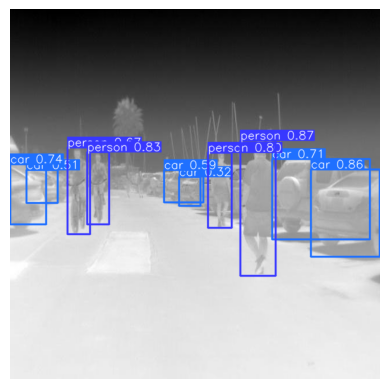

In [22]:
# To test model on a single image
img_original = "datasets/data/test/images/FLIR_02093_jpeg_jpg.rf.d1a3f038865c00af37cff0030d43f26e.jpg"
results = model(img_original) # Resize image to 640x640
img = results[0].plot()

%matplotlib inline
plt.imshow(img)
plt.axis('off')
plt.show()
